## 3.2.2　AR（自己回帰）モデルの原理

・自己回帰モデル：横軸にずらした時間をとる

・ARモデルは、基本的に定常性のあるデータにしか適用できないので、事前に定常性検定をする必要がある

In [1]:
import io
import requests
import statsmodels
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA

In [2]:
content = pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates=True, dtype='float')
content

,#Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


In [3]:
content = content.rename(columns={'#Passengers': 'passengers'})

print(content.shape)
content.head(10)

(144, 1)


,passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
1949-06-01,135.0
1949-07-01,148.0
1949-08-01,148.0
1949-09-01,136.0


In [4]:
pd.DataFrame([['Month', '月'],
              ['passenger', '飛行機の乗客数']],
              columns=['カラム', '意味'])

,カラム,意味
0,Month,月
1,passenger,飛行機の乗客数


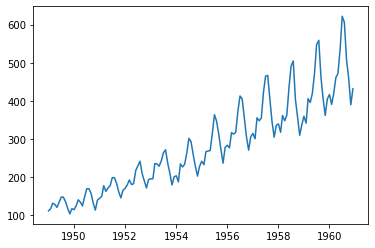

In [5]:
passengers = content['passengers']

plt.plot(passengers)
plt.show()

・自己相関（ACF）：$y(t)$ と $y(t-h)$　の間のすべてのデータを介して相関を計算<br>
・偏自己相関（PACF）：$y(t)$ と $y(t-h)$　の2のデータのみで相関を計算

・ADF検定（Augmented Dicky-Fuller test）を行う

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


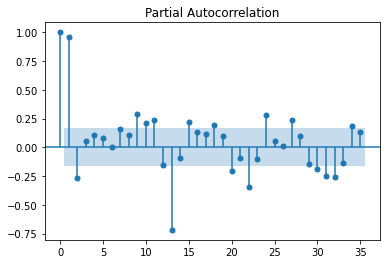

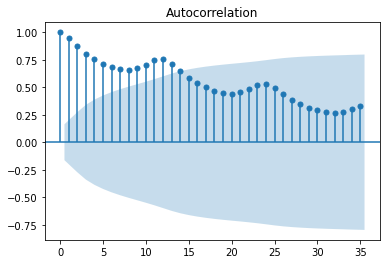

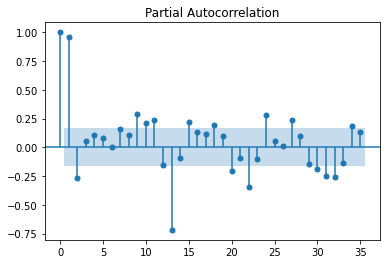

In [6]:
result = sm.tsa.stattools.adfuller(passengers)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
sm.graphics.tsa.plot_acf(passengers, lags=35)
sm.graphics.tsa.plot_pacf(passengers, lags=35)

・p値が非常に大きいので、データは非定常性をもつことが示される<br>
・ADF統計値は、すべての臨界値（Critical Value）より大きいので、非定常性であることが示唆される

・ホワイトノイズ：正規乱数ノイズ

・月ごとの飛行機の乗客数なので、ラグ1で大きな正の相関がある<br>
・つまり、先月の乗客数が多ければ今月も多くなる傾向がある（先月と今月のデータが正の相関という意味である）

・AICを基準にして、モデルのを選定を行う

In [7]:
ar = sm.tsa.AR(passengers)
print ('the order of arma is', ar.select_order(maxlag=6, ic='aic'))

the order of arma is 5


/Library/Python/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureW

In [8]:
AR = ARMA(passengers, order=(5, 0)).fit(dist=False)

/Library/Python/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Library/Python/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so in

・AR(5)モデルの残差（予測値と実測値の差）に対する相関分析を行う

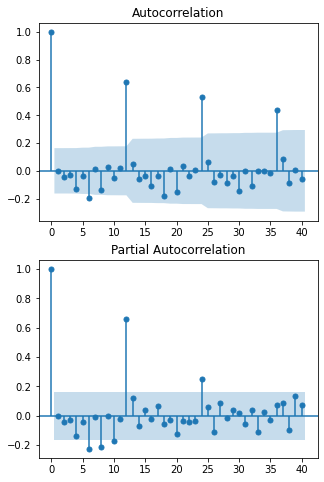

In [9]:
resid = AR.resid
fig = plt.figure(figsize=(5,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

・定常性のデータであれば、残差どうしに相関はない<br>
・上記のデータだと、残差どうしに相関が残っているので、非定常性のデータであるといえる

In [10]:
passengers[72:120].head()

Month
1955-01-01    242.0
1955-02-01    233.0
1955-03-01    267.0
1955-04-01    269.0
1955-05-01    270.0
Name: passengers, dtype: float64

In [11]:
passengers[72:120].tail()

Month
1958-08-01    505.0
1958-09-01    404.0
1958-10-01    359.0
1958-11-01    310.0
1958-12-01    337.0
Name: passengers, dtype: float64

(array([-5479., -5298., -5114., -4932., -4748., -4567., -4383., -4202.,
        -4018.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

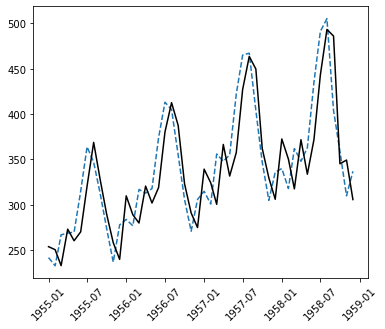

In [12]:
pred = AR.predict(start='1955-01-01', end='1958-12-01')

plt.figure(figsize=(6,5))
plt.plot(passengers[72:120],'--')
plt.plot(pred, "k")
plt.xticks(rotation=45)

・In-sample 法：学習データの範囲内で行う予測（上記）<br>
・Out-sample 法：学習データの範囲外で行う予測（下記）

・見せかけの回帰：上記のように、予測値がおおむね実測値の結果をそのまま写しているように見える現象

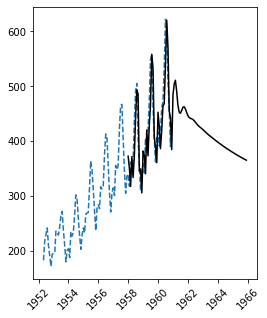

In [13]:
pred = AR.predict('1958-01-01', '1965-12-01')
plt.figure(figsize=(4,5))
plt.plot(passengers[40:],'--')
plt.plot(pred, "k")
plt.xticks(rotation=45)

plt.show()

・上記に関しても、非定常性のデータに適応できない回帰モデルなので、上手く予測ができていない

・今回のデータは、下記のように時間とともに乗客数が増えていくというトレンドをもっている<br>
・そのトレンドによって、時系列データの平均値が一定にならないことが原因となっている

・共和分は、そのトレンドを微分の効果で除去することができる<br>
・そのため、共和分という前処理を行い、定常性をもつデータに変換する必要がある

### 共和分でのAR回帰

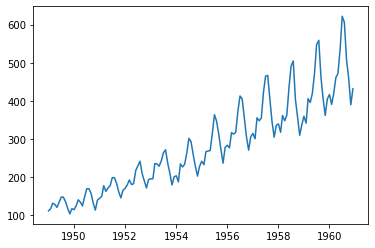

In [14]:
plt.plot(passengers)
plt.show()

・共和分を行うと、次のようになる

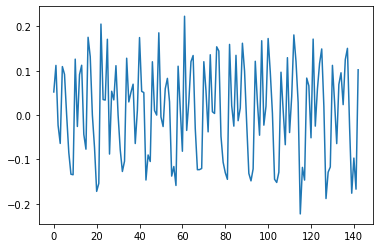

In [15]:
diff = np.diff(np.log(passengers))

plt.plot(diff)
plt.show()

In [16]:
print(content.shape)
content.head()

(144, 1)


,passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [17]:
content['passengers_log'] = np.log(content['passengers'])
content['passengers_log_shifted'] = content['passengers_log'].shift(periods=1)
content['diff'] = content['passengers_log'] - content['passengers_log_shifted']

content = content.fillna(0)

print(content.shape)
content.head()

(144, 4)


,passengers,passengers_log,passengers_log_shifted,diff
Month,,,,
1949-01-01,112.0,4.718499,0.000000,0.000000
1949-02-01,118.0,4.770685,4.718499,0.052186
1949-03-01,132.0,4.882802,4.770685,0.112117
1949-04-01,129.0,4.859812,4.882802,-0.022990
1949-05-01,121.0,4.795791,4.859812,-0.064022


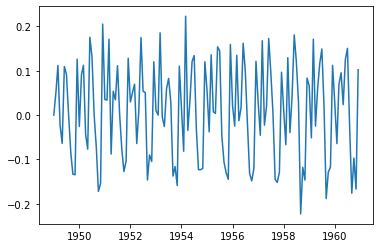

In [18]:
diff = content['diff']

plt.plot(diff)
plt.show()

ADF Statistic: -2.674290
p-value: 0.078594
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


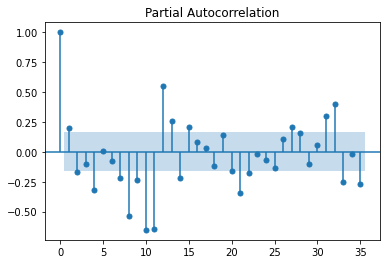

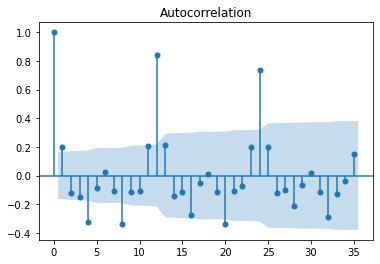

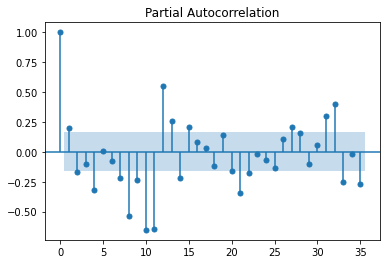

In [19]:
result = sm.tsa.stattools.adfuller(diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
sm.graphics.tsa.plot_acf(diff, lags=35)
sm.graphics.tsa.plot_pacf(diff, lags=35)

・ADF統計値は、すべての臨界値（Critical Value）より大きいので、非定常性であることが示唆される

In [20]:
ar = sm.tsa.AR(diff)
print ('the order of arma is', ar.select_order(maxlag=6, ic='aic'))

the order of arma is 4


/Library/Python/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureW

In [21]:
AR = ARMA(diff, order=(4, 0)).fit(dist=False)

/Library/Python/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Library/Python/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so in

/Library/Python/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


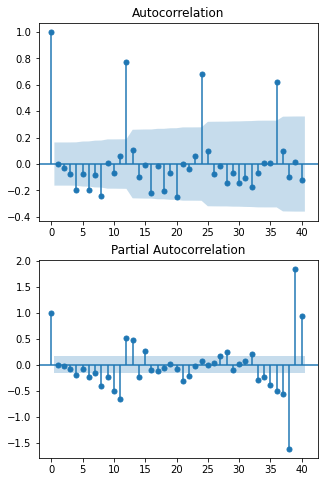

In [22]:
resid = AR.resid
fig = plt.figure(figsize=(5,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)

・上記のデータだと、残差どうしに相関が残っているので、非定常性のデータであるといえる

・ADF統計値と残差どうしの相関から、テキスト通りに共和分を実行しても、非定常性のままであることが考えられる

In [23]:
diff[72:120].head()

Month
1955-01-01    0.055216
1955-02-01   -0.037899
1955-03-01    0.136210
1955-04-01    0.007463
1955-05-01    0.003711
Name: diff, dtype: float64

In [24]:
passengers[72:120].tail()

Month
1958-08-01    505.0
1958-09-01    404.0
1958-10-01    359.0
1958-11-01    310.0
1958-12-01    337.0
Name: passengers, dtype: float64

(array([-5479., -5298., -5114., -4932., -4748., -4567., -4383., -4202.,
        -4018.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

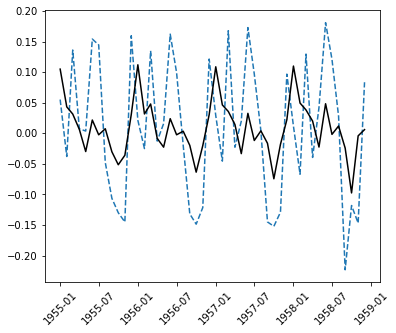

In [25]:
pred = AR.predict(start='1955-01-01', end='1958-12-01')

plt.figure(figsize=(6,5))
plt.plot(diff[72:120], '--')
plt.plot(pred, "k")
plt.xticks(rotation=45)

In [26]:
content['pred_diff'] = pred
content[72:77]

,passengers,passengers_log,passengers_log_shifted,diff,pred_diff
Month,,,,,
1955-01-01,242.0,5.488938,5.433722,0.055216,0.104989
1955-02-01,233.0,5.451038,5.488938,-0.037899,0.043239
1955-03-01,267.0,5.587249,5.451038,0.136210,0.031551
1955-04-01,269.0,5.594711,5.587249,0.007463,0.006511
1955-05-01,270.0,5.598422,5.594711,0.003711,-0.029808


(array([-5479., -5298., -5114., -4932., -4748., -4567., -4383., -4202.,
        -4018.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

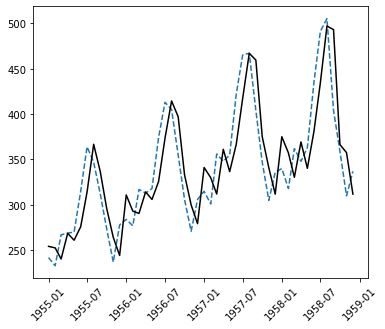

In [27]:
pred = np.exp(AR.predict('1955-01-01', '1958-12-01') + content['passengers_log_shifted'][72:120])

plt.figure(figsize=(6,5))
plt.plot(content['passengers'][72:120],'--')
plt.plot(pred, "k")
plt.xticks(rotation=45)

・見せかけの回帰（予測値がおおむね実測値の結果をそのまま写しているように見える現象）になってしまっている

In [28]:
content['pred_passengers'] = pred
content[72:77]

,passengers,passengers_log,passengers_log_shifted,diff,pred_diff,pred_passengers
Month,,,,,,
1955-01-01,242.0,5.488938,5.433722,0.055216,0.104989,254.349836
1955-02-01,233.0,5.451038,5.488938,-0.037899,0.043239,252.693415
1955-03-01,267.0,5.587249,5.451038,0.136210,0.031551,240.468487
1955-04-01,269.0,5.594711,5.587249,0.007463,0.006511,268.744194
1955-05-01,270.0,5.598422,5.594711,0.003711,-0.029808,261.100054
